# MALIGNANT COMMENTS CLASSIFICATION


Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.
Highly Malignant: It denotes comments that are highly malignant and hurtful.
Rude: It denotes comments that are very rude and offensive.
Threat: It contains indication of the comments that are giving any threat to someone.
Abuse: It is for comments that are abusive in nature.
Loathe: It describes the comments which are hateful and loathing in nature.
ID: It includes unique Ids associated with each comment text given.
Comment text: This column contains the comments extracted from various social media platforms.
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.

In [2]:
#importing the required libraries
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv("C:/Users/Shiva Labade/Downloads/Malignant-Comments-Classifier-Project--1---1-/Malignant Comments Classifier Project/train.csv")
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


EDA.

Here I will be doing Exploratory data Analysis for the given dataset



In [4]:
#rows and cloumn for the given dataset
df_train.shape

(159571, 8)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [7]:
#Id will be nominal data here so removing the same
df_train.drop('id',axis=1,inplace=True)

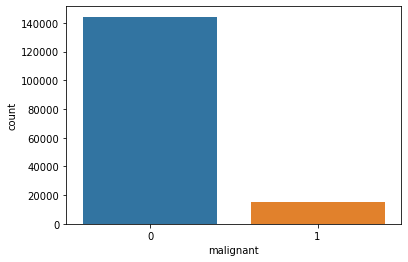

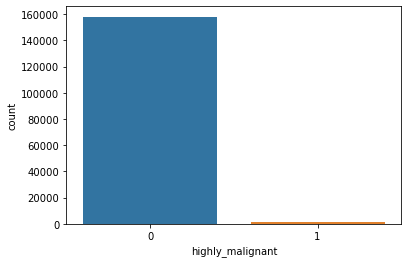

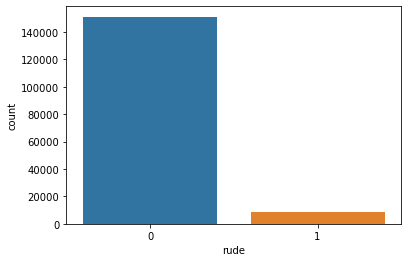

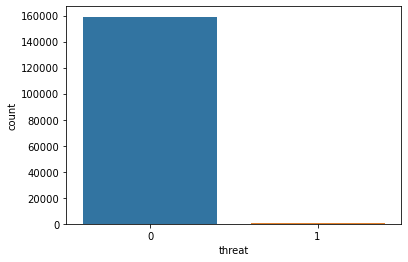

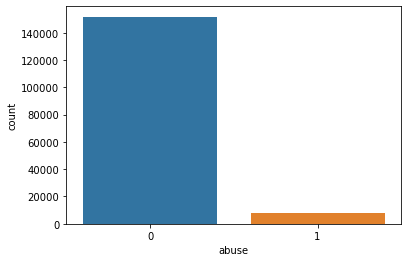

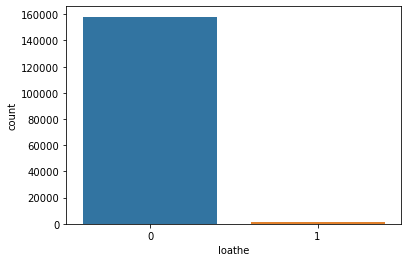

In [8]:
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
for i in columns:
    sns.countplot(df_train[i])
    plt.show()

we can see that there only mimimum values of columns in 'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe' and remaining all in 0.

In [9]:
df_train.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [10]:
#Storing the number of counts for every target label
counts=df_train.iloc[:,1:].sum()
counts

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

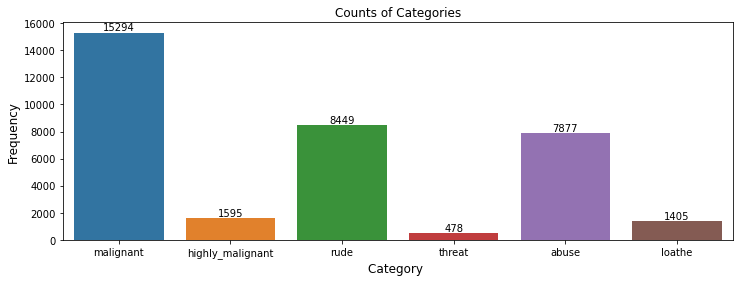

In [11]:
#Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [12]:
#Visualizing the label distribution of comments using pie chart
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
df_distribution = df_train[columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')
df_distribution

,count
threat,478
loathe,1405
highly_malignant,1595
abuse,7877
rude,8449
malignant,15294


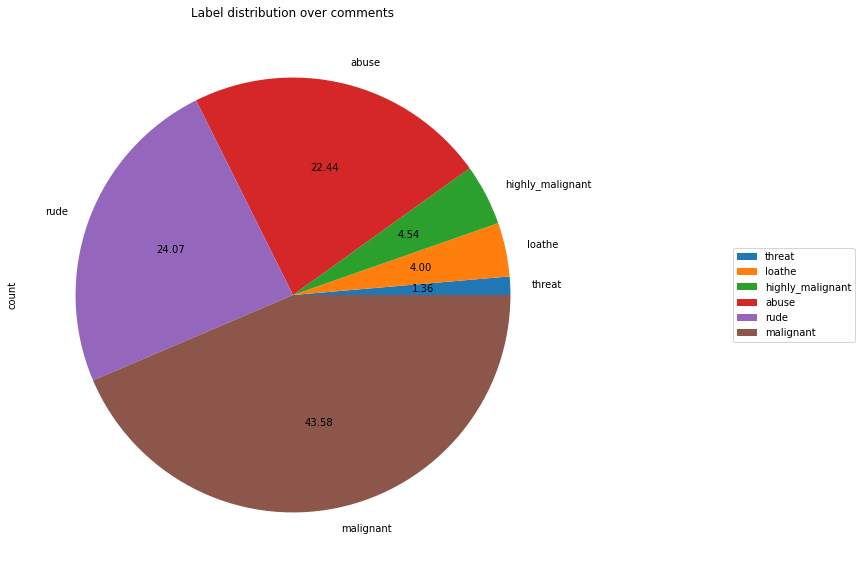

In [13]:
df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (20, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

As we see above malignant, and rude senterence are high classified and threat, loathe are least classified.



<AxesSubplot:xlabel='comment_text', ylabel='Density'>

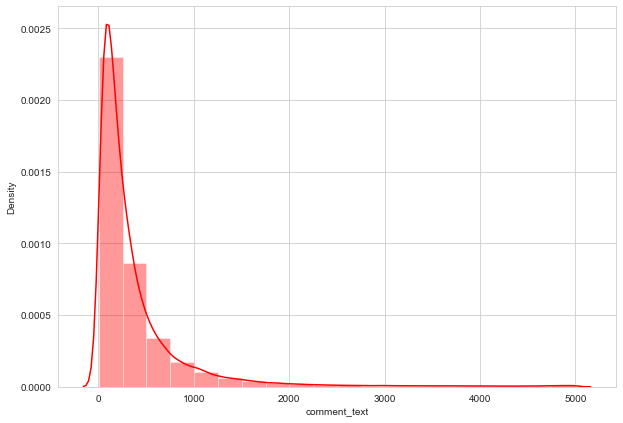

In [14]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'red')

we can see that few senterences are really long but most of the senterence are small.

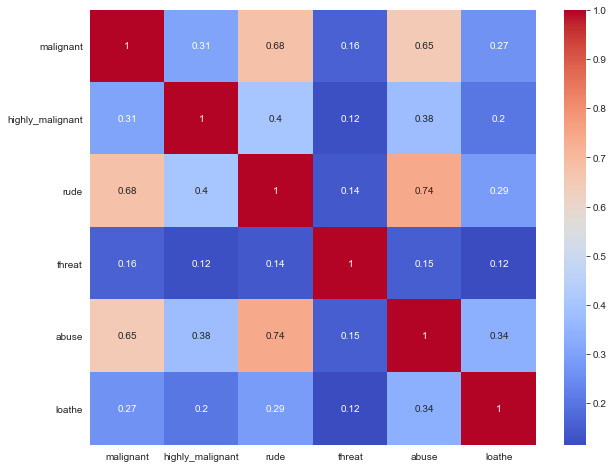

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot = True, cmap= "coolwarm")
plt.show()

Key Observatiopns:

- We can see more corelations in the variables, Abuse have more corelation with malignant and rude.
- Rude has more postive corelation with malignant
- we dont have any negative corellations in the data.


Feature creation.

In [16]:
df_train['label']=df_train[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']].sum(axis=1)

In [17]:
df_train.head(20) #I have created the feature label to count the sum of all put together

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


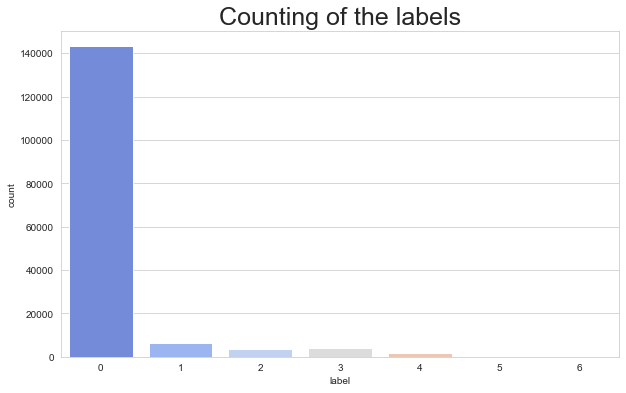

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df_train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

- Here 0 denotes non of the variables like 'malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe'
- 1 denotes one amoung these variables and 2 is two among these variables and so on.

In [19]:
           #converting all the lable as 0 and 1, 1 denotes for malignant Comments
df_train['label'] =( df_train['label'] >0).astype(int)
df_train.head(15)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [20]:
 df_train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [21]:
#Creating a column 'length_before_cleaning' in training dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [30]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Shiva Labade/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Shiva Labade\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [32]:
#Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [33]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Shiva Labade/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Shiva Labade\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [34]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train.head(20)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,67
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0,65,65
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1,44,44
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0,115,115
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0,472,472
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0,70,70


In [35]:
#Checking Total length removal in train dataset
print("Original Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 62893130
Total Words Removed: 0


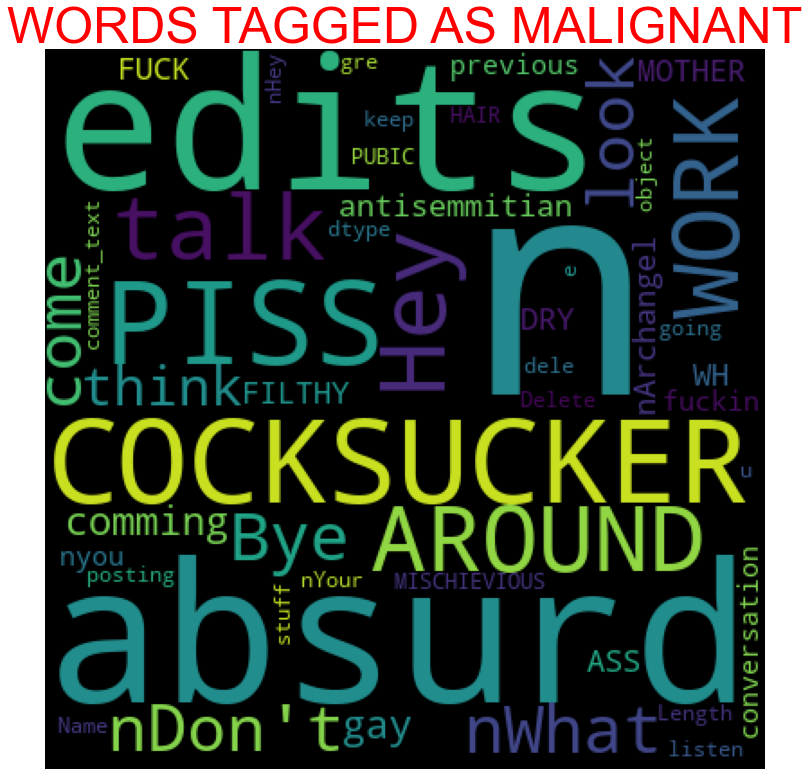

In [36]:
df_malignant=df_train[(df_train['malignant']==1)]


#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

We can see the foul words that are mostly used in malignant classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.



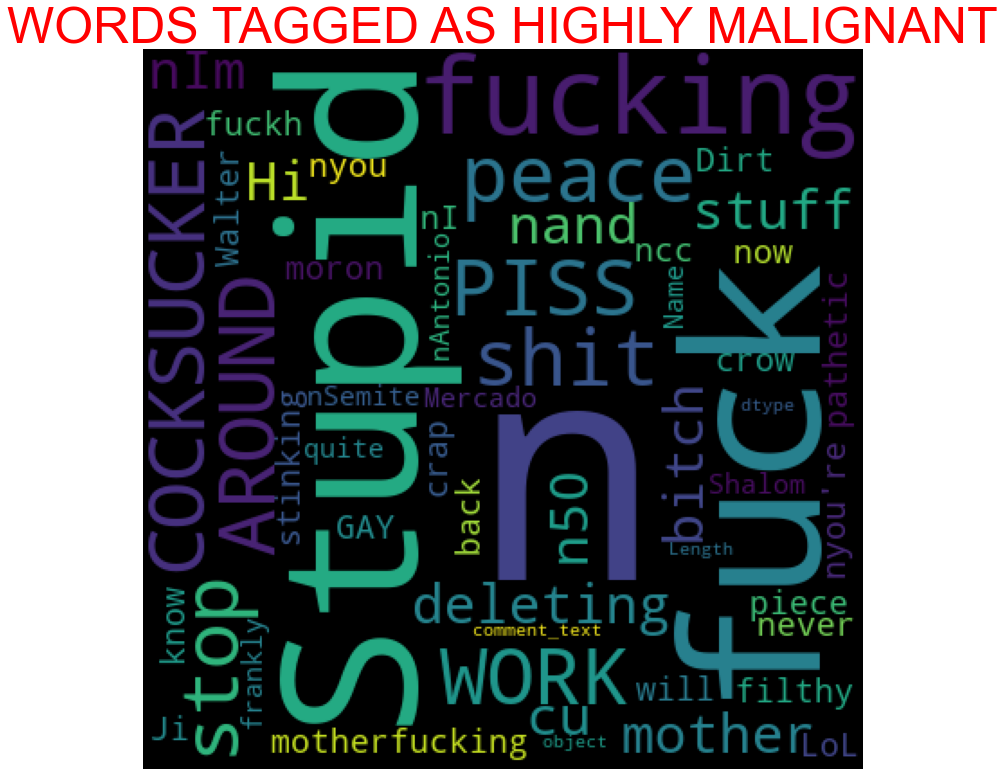

In [37]:
df_highlymalignant=df_train[(df_train['highly_malignant']==1)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

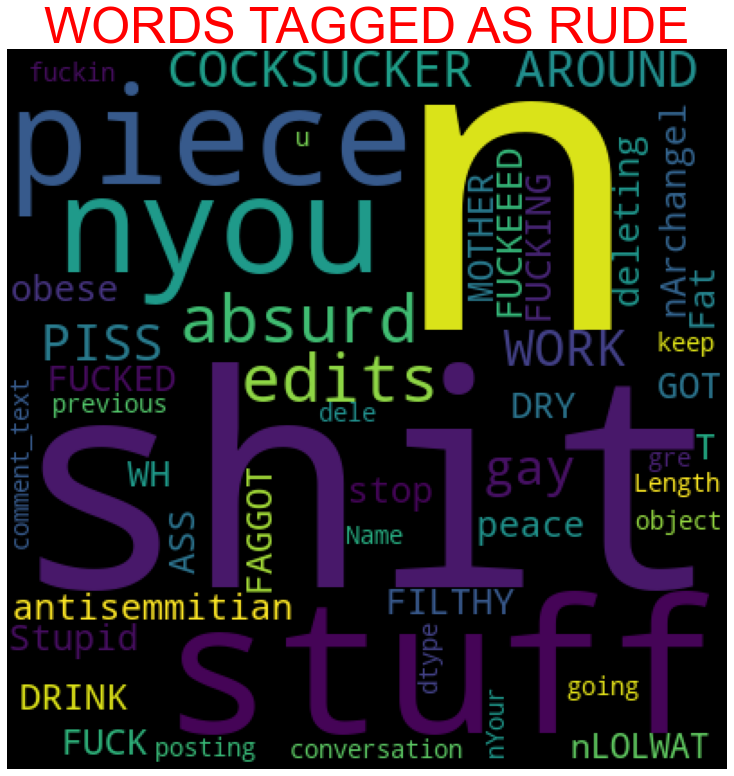

In [38]:
df_rude = df_train[(df_train['rude']==1)]

wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

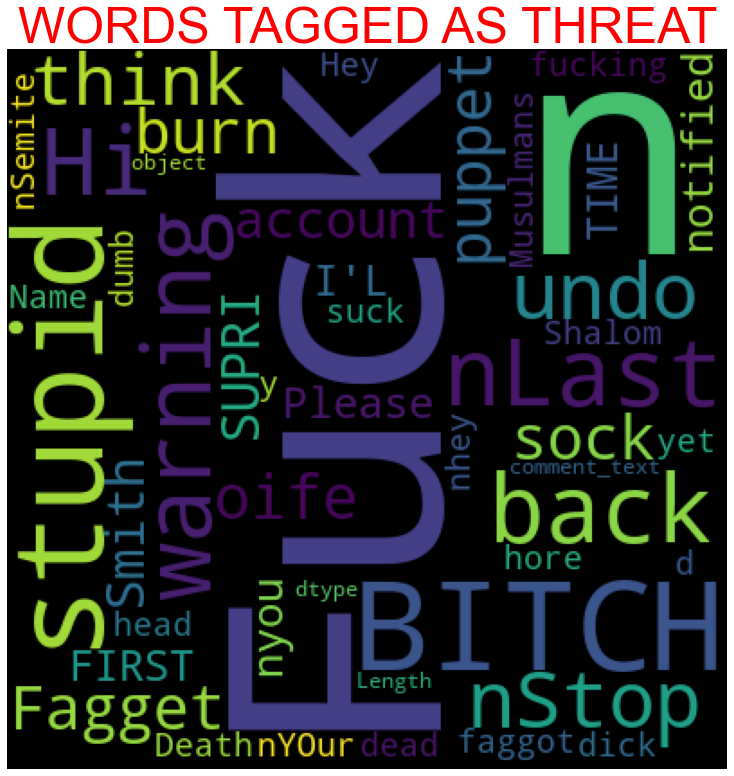

In [39]:
df_threat=df_train[(df_train['threat']==1)]


#Plotting for threat
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

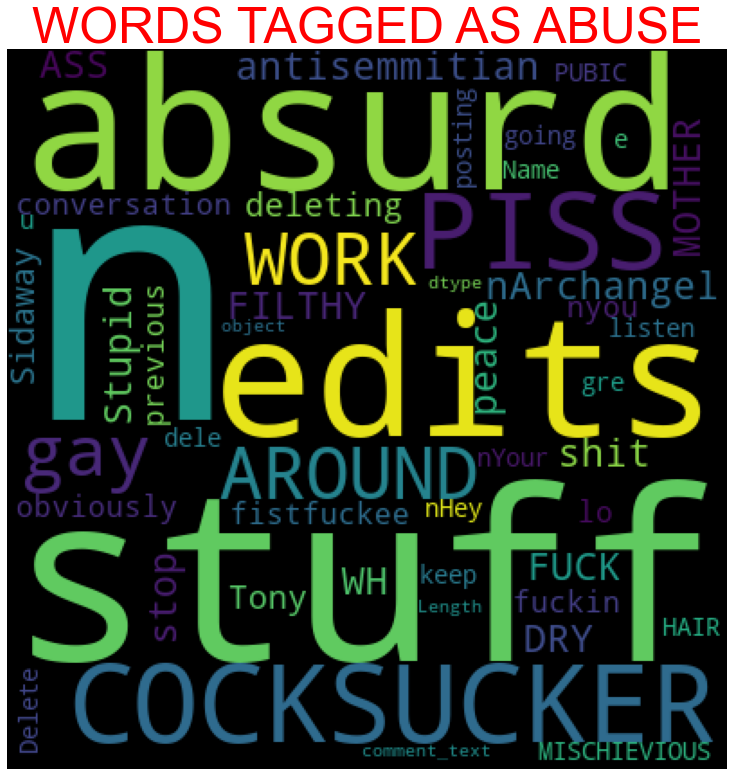

In [40]:
df_abuse=df_train[(df_train['abuse']==1)]

#Plotting for abuse
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

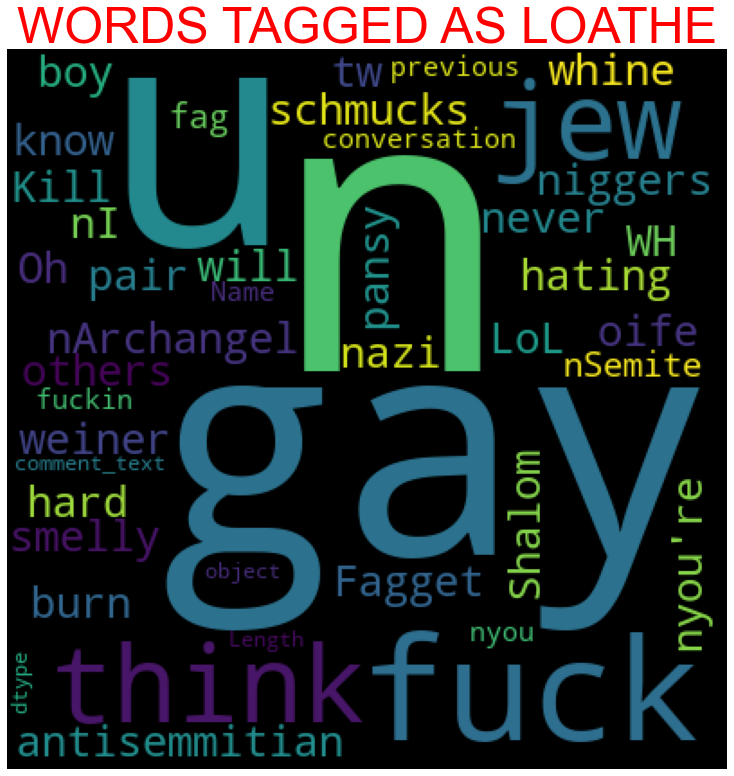

In [41]:
df_loathe=df_train[(df_train['loathe']==1)]


#Plotting for loathe
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

We can see the foul words that are mostly used in loathe classified senterences we are seeing top 400 words the words which are bigger in size are mostly used.

In [42]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [43]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])

In [44]:
y =df_train['label']

In [45]:
### Selecting parameters for training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

accu = 0
for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 95.87396285062543 found on randomstate 88


In [46]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .25, random_state = best_rstate,stratify=y)

Selecting the Best model for Training


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn import metrics
!pip install xgboost
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [49]:
def sort_mod(estimator, x_train, y_train, cv=5, verbose=True):
   
    scoring = {"accuracy": "accuracy",
               "precision": "precision_weighted",
               "recall": "recall_weighted",
               "f1": "f1_weighted"}
    scores = cross_validate(estimator, x_train, y_train, cv=cv, scoring=scoring)
    accuracy, accuracy_std = scores['test_accuracy'].mean(),scores['test_accuracy'].std()
    precision, precision_std = scores['test_precision'].mean(),scores['test_precision'].std()
    recall, recall_std = scores['test_recall'].mean(),scores['test_recall'].std()
    f1, f1_std = scores['test_f1'].mean(),scores['test_f1'].std()

    
    ScoRes = {"Accuracy": accuracy,"Accuracy std": accuracy_std,"Precision": precision,"Precision std": precision_std,
              "Recall": recall,"Recall std": recall_std,"f1": f1,"f1 std": f1_std,}
    
    if verbose:
        print(f"Accuracy: {accuracy} - (std: {accuracy_std})")
        print(f"Precision: {precision} - (std: {precision_std})")
        print(f"Recall: {recall} - (std: {recall_std})")
        print(f"f1: {f1} - (std: {f1_std})")

    return ScoRes

In [50]:
models = [LogisticRegression(), RandomForestClassifier(random_state=42),
          DecisionTreeClassifier(random_state=42), ExtraTreeClassifier(random_state=42), 
          AdaBoostClassifier(random_state=42), GradientBoostingClassifier(random_state=42), 
          xgb.XGBClassifier()]

model_names = ["LogisticRegression", "Random Forest",
               "Decision Tree", "Extra Tree", "Ada Boost", 
               "Gradient Boosting", "XGBoost"]

In [51]:
accuracy = []
precision = []
recall = []
f1 = []

for model in range(len(models)):
    print(f"\n\nStep {model+1} of {len(models)}")
    print(f"....................................................................running {model_names[model]}")
    
    clf_scores = sort_mod(models[model], x_train, y_train)
    
    accuracy.append(clf_scores["Accuracy"])
    precision.append(clf_scores["Precision"])
    recall.append(clf_scores["Recall"])
    f1.append(clf_scores["f1"])



Step 1 of 7
....................................................................running LogisticRegression
Accuracy: 0.9536088402022411 - (std: 0.000954509388296107)
Precision: 0.952845192951728 - (std: 0.0010251351657531666)
Recall: 0.9536088402022411 - (std: 0.000954509388296107)
f1: 0.9487411374856632 - (std: 0.001192905435399022)


Step 2 of 7
....................................................................running Random Forest
Accuracy: 0.9569260769474814 - (std: 0.0009281920388698516)
Precision: 0.9547897743608965 - (std: 0.0010341035435178438)
Recall: 0.9569260769474814 - (std: 0.0009281920388698516)
f1: 0.9547378032927696 - (std: 0.001005130303262445)


Step 3 of 7
....................................................................running Decision Tree
Accuracy: 0.9407744159203458 - (std: 0.001033152837745664)
Precision: 0.9403719574962196 - (std: 0.001114713187593956)
Recall: 0.9407744159203458 - (std: 0.001033152837745664)
f1: 0.9405637291021824 - (std: 0.0010594941030

In [52]:
df_result = pd.DataFrame({"Model": model_names,
                          "accuracy": accuracy,
                          "precision": precision,
                          "recall": recall,
                          "f1": f1})
df_result.sort_values(by="f1", ascending=False)

,Model,accuracy,precision,recall,f1
1,Random Forest,0.956926,0.954790,0.956926,0.954738
0,LogisticRegression,0.953609,0.952845,0.953609,0.948741
6,XGBoost,0.952615,0.951152,0.952615,0.947940
2,Decision Tree,0.940774,0.940372,0.940774,0.940564
4,Ada Boost,0.945161,0.942077,0.945161,0.939370
5,Gradient Boosting,0.938970,0.939707,0.938970,0.928110
3,Extra Tree,0.920186,0.922055,0.920186,0.921066


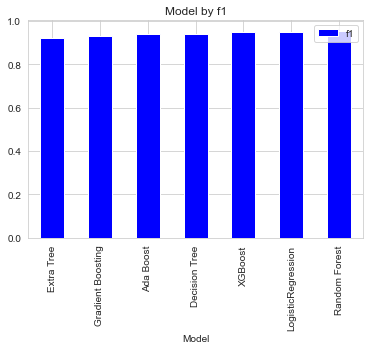

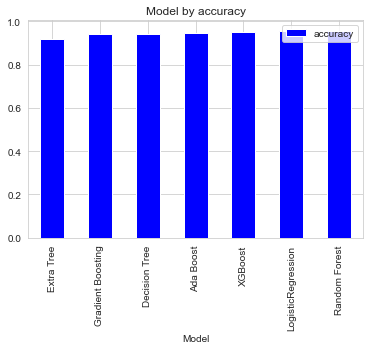

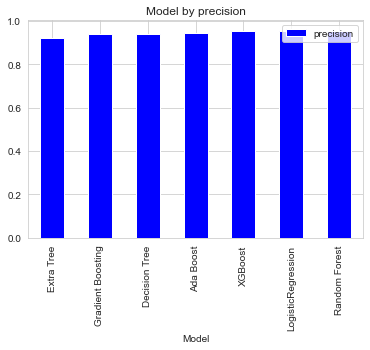

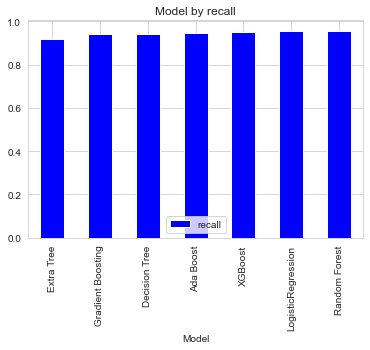

In [54]:
metrics_list = ["f1", "accuracy", "precision", "recall"]

for metric in metrics_list:
    df_result.sort_values(by=metric).plot.bar("Model", metric, color = 'blue')
    plt.title(f"Model by {metric}")
    plt.show()

Among our model we have Random Forest tops the chart.

1.accuracy = 0.955865

2.precision = 0.953608

3.recall = 0.955865

4.f1 = 0.953448

In [55]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [56]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_prob=clf_rf.predict_proba(x_test)
y_pred_prob


array([[0.95916667, 0.04083333],
       [0.76048268, 0.23951732],
       [0.97      , 0.03      ],
       ...,
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [58]:
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)

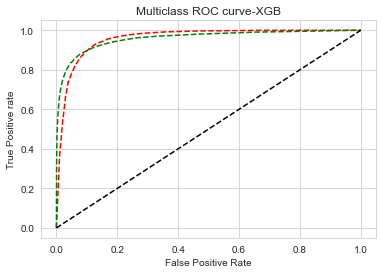

In [59]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')

plt.title('Multiclass ROC curve-XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

In [60]:
clf_rf.get_params()

preds = cross_val_predict(clf_rf, x_train, y_train, cv=5, n_jobs=-1)
pd.crosstab(y_train, preds, rownames = ['Real'], colnames =['Predicted'])

print(metrics.classification_report(y_train, preds, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    107509
           1       0.86      0.69      0.76     12169

    accuracy                           0.96    119678
   macro avg       0.91      0.84      0.87    119678
weighted avg       0.95      0.96      0.95    119678



Saving our model


In [61]:
import joblib
joblib.dump(clf_rf,"Malignant_classifier.obj")

['Malignant_classifier.obj']

In [63]:
#importing test tabel.
df_test=pd.read_csv("C:/Users/Shiva Labade/Downloads/Malignant-Comments-Classifier-Project--1---1-/Malignant Comments Classifier Project/train.csv")
df_test


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [65]:
X_test = tf_vec.fit_transform(df_test['comment_text'])

Malignant_classifier= joblib.load('Malignant_classifier.obj')
predi= Malignant_classifier.predict(X_test)

Predicted=pd.DataFrame({"Malignant_classifier":predi})
Predicted.head()

Predicted.value_counts()

Predicted.to_csv("Malignant_classifier_Predicted.csv")

Conclusion

I have trained the data with Random forest model and have done the prediction with test data and saved it as "Malignant_classifier_Predicted.csv"

